# Exercise 4: Hate Speech Classification using Multinomial Naive Bayes

Instructions:
- You do not need to split your data. Use the training, validation and test sets provided below.
- Use Multinomial Naive Bayes to train a model that can classify if a sentence is a hate speech or non-hate speech
- A sentence with a label of zero (0) is classified as non-hate speech
- A sentence with a label of one (1) is classified as a hate speech

Apply text pre-processing techniques such as
- Converting to lowercase
- Stop word Removal
- Removal of digits, special characters
- Stemming or Lemmatization but not both
- Count Vectorizer or TF-IDF Vectorizer but not both

Evaluate your model by:
- Providing input by yourself
- Creating a Confusion Matrix
- Calculating the Accuracy, Precision, Recall and F1-Score

In [ ]:
import pandas as pd
import numpy as py
from datasets import load_dataset
from nltk.stem import PorterStemmer




In [ ]:
splits = {'train': 'unique_train_dataset.csv', 'validation': 'unique_validation_dataset.csv', 'test': 'unique_test_dataset.csv'}

**Training Set**

Use this to train your model

In [ ]:
df_train = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["train"])

**Validation Set**

Use this set to evaluate your model

In [ ]:
df_validation = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["validation"])

**Test Set**
  
Use this set to test your model

In [ ]:
df_test = pd.read_csv("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/" + splits["test"])

## A. Understanding your training data



```
# This is formatted as code
```

1. Check the first 10 rows of the training dataset

In [102]:

url = ("hf://datasets/mapsoriano/2016_2022_hate_speech_filipino/unique_train_dataset.csv")
data = pd.read_csv(url)
df = pd.DataFrame(data)
df.head(11)



,text,label
0,Presidential candidate Mar Roxas implies that ...,1
1,Parang may mali na sumunod ang patalastas ng N...,1
2,Bet ko. Pula Ang Kulay Ng Posas,1
3,[USERNAME] kakampink,0
4,Bakit parang tahimik ang mga PINK about Doc Wi...,1
5,"""Ang sinungaling sa umpisa ay sinungaling hang...",1
6,Leni Kiko,0
7,Nahiya si Binay sa Makati kaya dito na lang sa...,1
8,Another reminderHalalan,0
9,[USERNAME] Maybe because VP Leni Sen Kiko and ...,0


2. Check how many rows and columns are in the training dataset using `.info()`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21773 entries, 0 to 21772
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    21773 non-null  object
 1   label   21773 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 340.3+ KB


3. Check for NaN values

In [ ]:
#checking for null values
data.isnull().sum()


,0
text,0
label,0


4. Check for duplicate rows

In [ ]:
data.duplicated().sum()


np.int64(0)

5. Check how many rows belong to each


In [ ]:
display(df_train['label'].value_counts())

,count
label,
1,10994
0,10779


## B. Text pre-processing

6. Remove duplicate rows

In [ ]:
df_train.drop_duplicates(inplace=True)
display(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21773 entries, 0 to 21772
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    21773 non-null  object
 1   label   21773 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 340.3+ KB


None

7. Remove rows with NaN values

In [ ]:
df_train.dropna(inplace=True)
display(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21773 entries, 0 to 21772
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    21773 non-null  object
 1   label   21773 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 340.3+ KB


None

8. Convert all text to lowercase

In [97]:
df_train['text'] = df_train['text'].str.lower()
df_validation['text'] = df_validation['text'].str.lower()
df_test['text'] = df_test['text'].str.lower()

9. Remove digits, URLS and special characters

In [99]:
import re

df['text'] = df['text'].str.replace(r'http\S+|www\S+', '', regex=True)   # remove URLs
df['text'] = df['text'].str.replace(r'[^a-zA-Z\s]', '', regex=True)      # remove special chars




10. Remove stop words

In [100]:
df['text'] = df['text'].str.replace(r'[stop]', '', regex=True)      # remove special chars


11. Use Stemming or Lemmatization




In [101]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

df['text'] = df['text'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))


## C. Training your model

12. Put all text training data in variable **X_train**

In [103]:
X_train = df_train["text"]

13. Put all training data labels in variable **y_train**

In [104]:
y_train = df_train["label"]

14. Use `CountVectorizer()` or `TfidfVectorizer()` to convert text data to its numerical form.

Put the converted data to **X_train_transformed** variable

In [105]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)

15. Create an instance of `MultinomalNB()`

In [106]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()



```
# This is formatted as code
```

16. Train the model using `.fit()`

In [108]:
model.fit(X_train_transformed, y_train)

MultinomialNB()

## D. Evaluate your model

17. Use `.predict()` to generate model predictions using the **validation dataset**


- Put all text validation data in **X_validation** variable

- Convert **X_validation** to its numerical form.

- Put the converted data to **X_validation_transformed**

- Put all predictions in **y_validation_pred** variable

In [118]:
X_validation = df_validation["text"]
X_validation_transformed = vectorizer.transform(X_validation)
y_validation_pred = model.predict(X_validation_transformed)

18. Get the Accuracy, Precision, Recall and F1-Score of the model using the **validation dataset**

- Put all validation data labels in **y_validation** variable

In [119]:
y_validation = df_validation["label"]

19. Create a confusion matrix using the **validation dataset**

Confusion Matrix:
[[1081  304]
 [ 176 1239]]


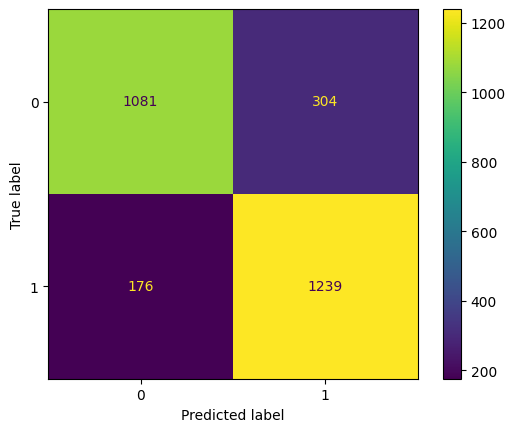

In [120]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, accuracy_score, balanced_accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_validation, y_validation_pred)
print("Confusion Matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [121]:
X_test = df_test["text"]
X_test_transformed = vectorizer.transform(X_test)
y_test_pred = model.predict(X_test_transformed)

20. Use `.predict()` to generate the model predictions using the **test dataset**


- Put all text validation data in **X_test** variable

- Convert **X_test** to its numerical form.

- Put the converted data to **X_test_transformed**

- Put all predictions in **y_test_pred** variable

In [122]:
y_validation = df_validation["label"]

21. Get the Accuracy, Precision, Recall and F1-Score of the model using the **test dataset**

- Put all test data labels in **y_validation** variable



In [130]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_test = df_test["label"]

In [126]:
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")

Test Set Accuracy: 0.8249


In [127]:
precision = precision_score(y_test, y_test_pred)
print(f"Test Set Precision: {precision:.4f}")

Test Set Precision: 0.7945


In [128]:
recall = recall_score(y_test, y_test_pred)
print(f"Test Set Recall: {recall:.4f}")

Test Set Recall: 0.8741


In [129]:
f1 = f1_score(y_test, y_test_pred)
print(f"Test Set F1-Score: {f1:.4f}")

Test Set F1-Score: 0.8324


22. Create a confusion matrix using the **test dataset**

 Confusion Matrix:
[[1096  316]
 [ 176 1222]]


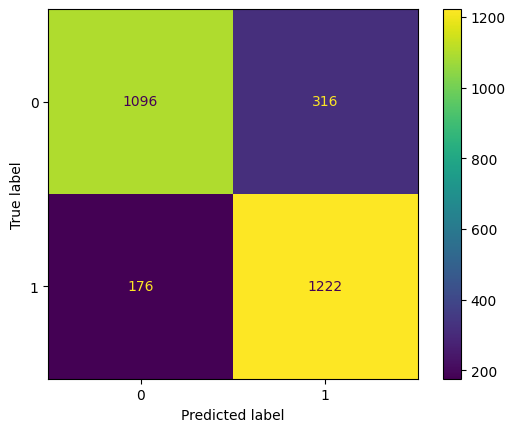

In [131]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_test = confusion_matrix(y_test, y_test_pred)
print(" Confusion Matrix:")
print(cm_test)

disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot()
plt.show()

## E. Test the model

\23. Test the model by providing a non-hate speech input. The model should predict it as 0

In [154]:

non_hate_speech_input = "mabait na mensahi"

non_hate_speech_input = non_hate_speech_input.lower()
stemmer = PorterStemmer()
non_hate_speech_input = " ".join([stemmer.stem(word) for word in non_hate_speech_input.split()])
non_hate_speech_input_transformed = vectorizer.transform([non_hate_speech_input])
prediction = model.predict(non_hate_speech_input_transformed)

print(f"Input: '{non_hate_speech_input} Predicted label: {prediction[0]}'")


# Check if the prediction is 0
if prediction[0] == 0:
    print("Prediction is correct (Non-hate speech)")
else:
    print("Prediction is incorrect (Expected 0)")

Input: 'mabait na mensahi Predicted label: 0'
Prediction is correct (Non-hate speech)


24. Test the model by providing a hate speech input. The model should predict it as 1

In [155]:
# Sample hate speech input
hate_speech_input = "fuck"

stemmer = PorterStemmer()
hate_speech_input = " ".join([stemmer.stem(word) for word in hate_speech_input.split()])
hate_speech_input_transformed = vectorizer.transform([hate_speech_input])
prediction = model.predict(hate_speech_input_transformed)
print(f"Input: '{hate_speech_input}'")
print(f"Predicted label: {prediction[0]}")

if prediction[0] == 1:
    print("Prediction is correct (Hate speech)")
else:
    print("Prediction is incorrect (Expected 1)")

Input: 'fuck'
Predicted label: 1
Prediction is correct (Hate speech)
